<a href="https://colab.research.google.com/github/coderanandmaurya/Decision-Tree/blob/main/Decision_Tree_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [23]:
URL="https://raw.githubusercontent.com/coderanandmaurya/Decision-Tree/main/dataset.csv"
data=pd.read_csv(URL)
data.head(5)

,color,diameter,label
0,green,3,Mango
1,yellow,3,Mango
2,red,1,Grape
3,red,1,Grape
4,yellow,3,Lemon


In [24]:
X=data.iloc[:,0:2]  # independent
y=data.iloc[:,2]   # dependent 

In [25]:
X.shape

(5, 2)

## **label encoder**

In [26]:
from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
X.iloc[:, 0] = X_labelencoder.fit_transform(X.iloc[:, 0])
print (X)

# for y
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

   color  diameter
0      0         3
1      2         3
2      1         1
3      1         1
4      2         3
[2 2 0 0 1]


## **Train Test Split**

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## **Model Selection**
- **criterion**: It defines the function to measure the impurity. Sklearn supports “gini” criteria for Gini Index  & “entropy” for Information Gain. By default, it takes “gini” value.
- **max_depth**: The max_depth parameter denotes maximum depth of the tree.


In [28]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(criterion = "mse" ,max_depth=2)
decision_tree.fit(X_train, y_train) # training to machine

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=2)

In [29]:
predictValues =decision_tree.predict(X_test) # test the machine 
predictValues

array([0.])

## **Accuracy**

In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictValues))

1.0


## **Feature Importance**

In [33]:
decision_tree.feature_importances_

array([0.07407407, 0.92592593])

## **Graph representation**

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


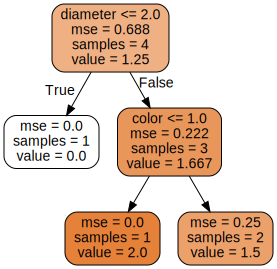

In [32]:
data_feature_names = X.columns
!pip install graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

graph = Source(tree.export_graphviz(decision_tree, feature_names=X.columns, filled = True,rounded=True))
display(SVG(graph.pipe(format='svg')))


d=2.4
c=0.8